# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle
import cupy as cp

# Data Fetching

In [2]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16],low_memory=False)
    out= pd.read_csv('data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19],low_memory=False)
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


# Min Max Scaler

In [3]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Model

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)


model6 =MultiOutputRegressor(KNeighborsRegressor(n_neighbors=7,weights='uniform',algorithm='auto',leaf_size=50,p=2))
model_fit6=model6.fit(x_train, y_train)

print('Model Training done!!')

# Dumping Model into a file

filename6 = 'Models_File/knn.sav'
pickle.dump(model_fit6, open(filename6, 'wb'))

Model Training done!!


# Error Analysis

In [5]:
from sklearn import metrics
from sklearn.metrics import r2_score
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

y_test_pred6=model_fit6.predict(x_test)
y_train_pred6=model_fit6.predict(x_train)

#finding out the r2 score
r2_test6=r2_score(y_test,y_test_pred6,multioutput='variance_weighted')
r2_train6=r2_score(y_train,y_train_pred6,multioutput='variance_weighted')

print('r2 score on train data '+ str(r2_train6))
print('r2 score on test data '+ str(r2_test6))

knn_mae=metrics.mean_absolute_error(y_test, y_test_pred6)
knn_mse=metrics.mean_squared_error(y_test, y_test_pred6)
knn_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred6))
print('Mean Absolute Error:',knn_mae)
print('Mean Squared Error:',knn_mse )
print('Root Mean Squared Error:',knn_rmse)

r2 score on train data 0.7456257407339981
r2 score on test data 0.650844072704262
Mean Absolute Error: 0.0018312254
Mean Squared Error: 4.8233207e-05
Root Mean Squared Error: 0.006945013


# y-test vs y-predict

Y_Test: [[0.00011559 0.06553685 0.00011085 ... 0.0021448  0.0014142  0.00052142]
 [0.00011088 0.06553695 0.00012144 ... 0.01090628 0.00639894 0.00234271]
 [0.0001138  0.06553686 0.00011756 ... 0.02938369 0.01855402 0.00761428]
 ...
 [0.00011103 0.06553663 0.00011547 ... 0.05674056 0.03595096 0.01243099]
 [0.00011477 0.06553688 0.00010965 ... 0.00815022 0.00468672 0.00148292]
 [0.00010879 0.06553657 0.00012025 ... 0.00375339 0.00246608 0.00081172]]
Y_Test_Predict: [[0.00011546 0.06553679 0.00010997 ... 0.00640681 0.00386692 0.00135243]
 [0.00011029 0.06553687 0.00012299 ... 0.00811652 0.00491546 0.00169688]
 [0.00011284 0.06553693 0.00011782 ... 0.0196785  0.01237714 0.0042929 ]
 ...
 [0.00011125 0.06553665 0.00011532 ... 0.05718024 0.03629992 0.01205484]
 [0.0001149  0.06553687 0.00010984 ... 0.00784995 0.00463913 0.00165329]
 [0.00011033 0.06553662 0.00012027 ... 0.0052287  0.00358975 0.00154209]]


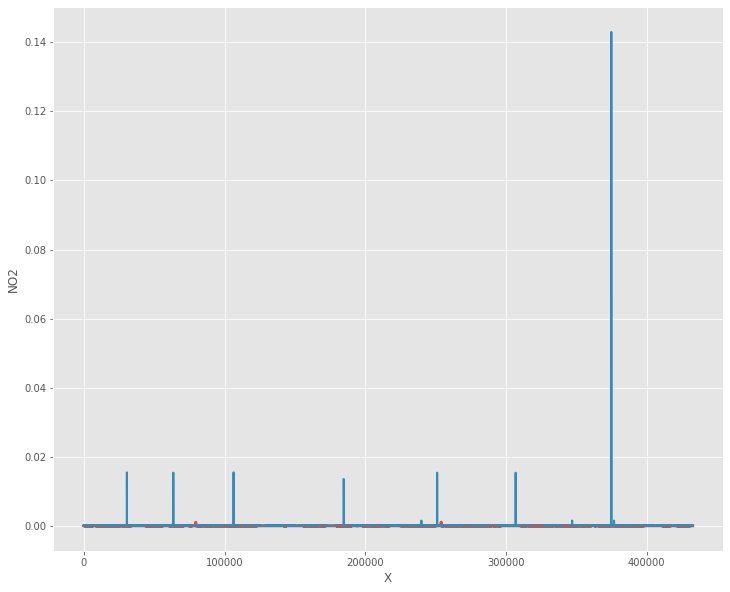

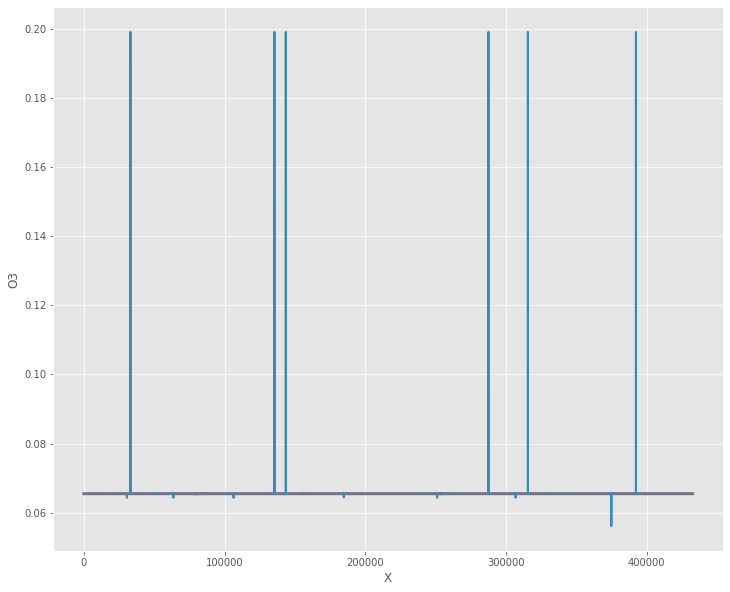

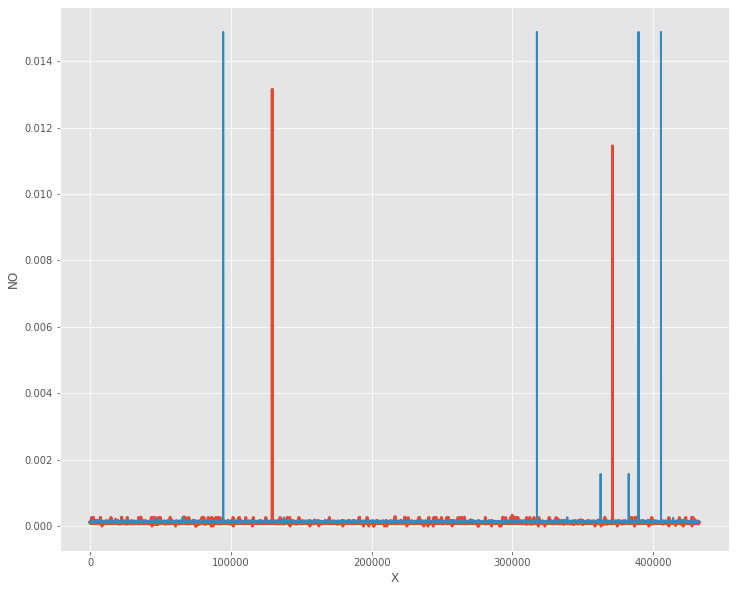

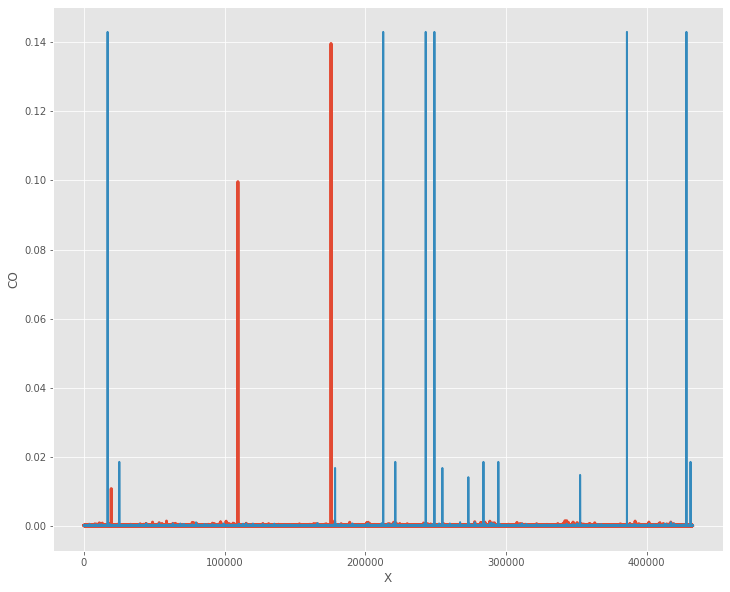

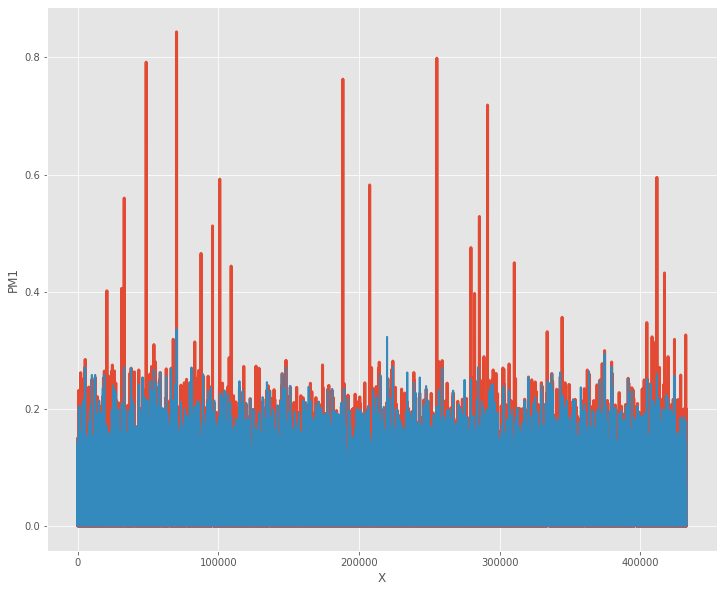

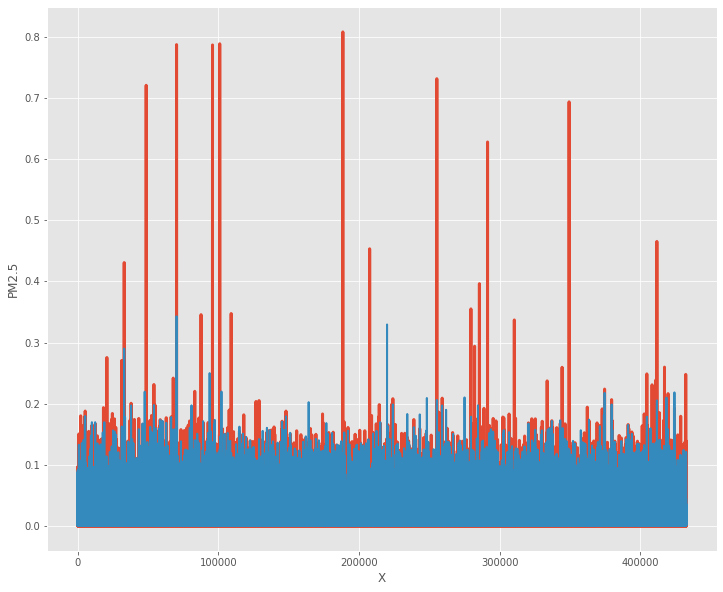

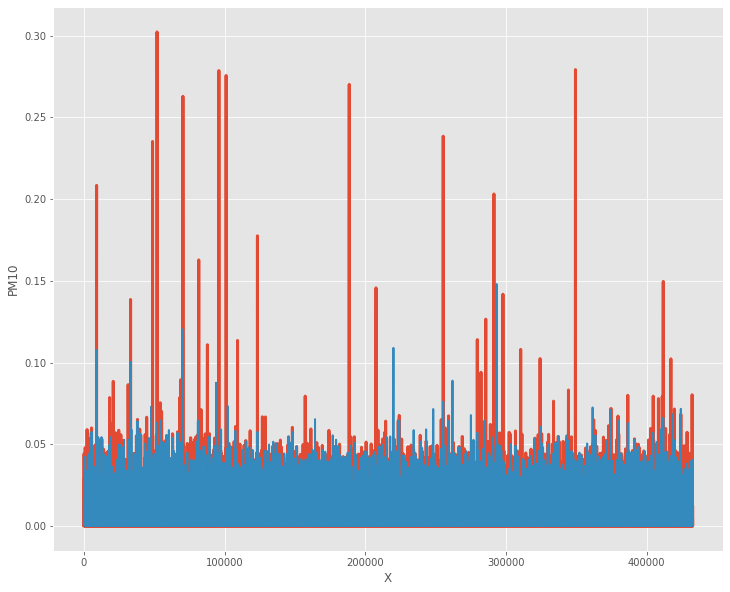

In [6]:
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred6)

from matplotlib import style
style.use('ggplot')

for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred6[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()